# Minería de Datos: Hito 1


### Grupo 6
### Valorant dataset

Integrantes:
 - Carlos Ambiado
 - Cristóbal Isla
 - Felipe Jara
 - Nicolás Peña
 - Manuel Sepúlveda



# Introducción

El problema presentado consiste en estudiar un dataset de VALORANT, un videojuego multijugador competitivo de disparos en primera persona desarrollado por Riot Games y lanzado en 2020. El juego consiste en partidas de 5 contra 5 jugadores, donde cada equipo se enfrenta a otro en rondas de ataque y defensa en una variedad de mapas. Cada jugador debe escoger un personaje con habilidades únicas que se utilizan durante las rondas, además de las propias mecánicas de los disparos, para poder así ganar la partida. El objetivo principal de las rondas, y por tanto, la forma de ganar, es eliminar completamente al equipo contrario o, dependiendo si el equipo está atacando o defendiendo, deberán plantar la bomba en sitio enemigo logrando que explote, o desactivar la bomba plantada por el enemigo.
Este dataset contiene datos de partidas profesionales del juego hasta Enero de 2021.

Nos centramos en estudiar y analizar este dataset pues todos los integrantes del grupo jugamos VALORANT, por lo que nos pareció más interesante y entretenido para lograr un mejor entendimiento del juego y recuperar estadísticas interesantes o encontrar relaciones entre los datos para obtener conclusiones respecto a estos.

# Exploración de datos

Para la exploración de datos utilizamos Python y la librería de Pandas

In [33]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

Los datos estan en formato .sqlite, por lo que utilizamos la librería sqlite3 para conectarnos a la base de datos y cargarlos a un dataframe de pandas.

In [34]:
con = sqlite3.connect("./dataset/valorant.sqlite")
game_scoreboard = pd.read_sql_query("SELECT * FROM game_scoreboard", con)
matches = pd.read_sql_query("SELECT * FROM matches", con)
games = pd.read_sql_query("SELECT * FROM games", con)
con.close()

Primero que nada, filtraremos los datos para que estos sean solo partidas jugadas en el evento de más alto nivel; la VALORANT Champions

In [35]:
data = pd.merge(game_scoreboard, games, on='GameID')
merged = pd.merge(data, matches, on="MatchID")
filtered = merged[merged['EventName'] == 'VALORANT Champions']

Ahora podemos ver las primeras filas de cada tabla, y contar los datos nulos de cada columna.

In [36]:
filtered.head()

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,...,Patch,EventID,EventName,EventStage,Team1ID_y,Team2ID_y,Team1_y,Team2_y,Team1_MapScore,Team2_MapScore
4809,57981,573,cNed,ACE,jett,178.0,16.0,16.0,0.0,0.0,...,Patch 3.10,449,VALORANT Champions,Playoffs: Grand Final,3531,682,Acend,Gambit Esports,3,2
4810,57981,562,zeek,ACE,kayo,170.0,13.0,17.0,9.0,-4.0,...,Patch 3.10,449,VALORANT Champions,Playoffs: Grand Final,3531,682,Acend,Gambit Esports,3,2
4811,57981,3672,BONECOLD,ACE,sova,168.0,14.0,16.0,4.0,-2.0,...,Patch 3.10,449,VALORANT Champions,Playoffs: Grand Final,3531,682,Acend,Gambit Esports,3,2
4812,57981,565,starxo,ACE,viper,144.0,12.0,20.0,4.0,-8.0,...,Patch 3.10,449,VALORANT Champions,Playoffs: Grand Final,3531,682,Acend,Gambit Esports,3,2
4813,57981,2894,Kiles,ACE,cypher,120.0,11.0,19.0,2.0,-8.0,...,Patch 3.10,449,VALORANT Champions,Playoffs: Grand Final,3531,682,Acend,Gambit Esports,3,2


In [37]:
assert(i==0 for i in filtered.isna().sum())

Para este evento, no existen datos nulos, por lo que no es necesario hacer una limpieza.

---
**Gráfico 1: Histograma de ADR**<br>
Una manera de medir la calidad de un jugador puede ser a través del daño que hacen a otros jugadores, para lo que se usa el ADR (Average Damage per Round). El Gráfico 1 de ADR vs. Frecuencia, nos puede servir como base para identificar si un jugador está por sobre la media en cuanto a daño inflingido por ronda. Como referencia, cada jugador inicia una ronda con 100 de vida y se tiene la posibilidad de comprar un escudo que añade 50 de vida adicional, la mayoría de las veces los jugadores compran el escudo, a no ser que la economía de su equipo no lo permita. 

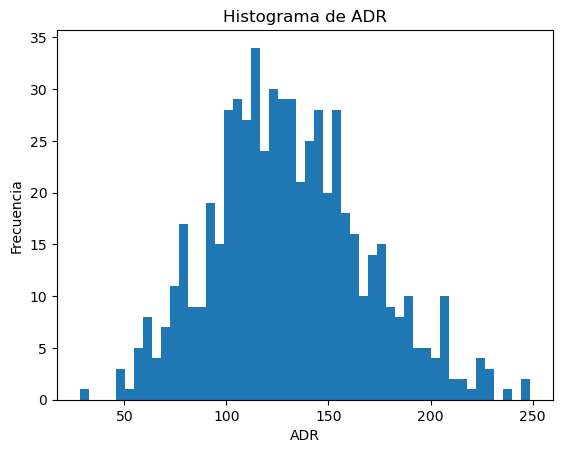

In [38]:
plt.hist(filtered["ADR"], bins=50)
plt.title("Histograma de ADR")
plt.xlabel("ADR")
plt.ylabel("Frecuencia")
plt.show()


Se puede ver que los ADR más comunes se encuentran entre 100 y 150, y muy poco sobre 200. Se podría concluir que hacer el daño equivalente a matar 1.5 jugadores por ronda podría poner a alguien en la élite de los jugadores, pero veremos que el ADR no basta para juzgar la calidad de un jugador.

---
**Gráfico 2: ACS versus KAST Percent** <br>
ACS (Average Combat Score) es una medida que otorga el juego al finalizar una partida, trata de mejorar el ADR añadiendo otras variables importantes como kills, kills múltiples y asistencias por rondas jugadas. <br>
KAST (Kill, Assist, Survived, Traded) sirve para medir la eficacia de un jugador teniendo en cuenta variables que se consideran como positivas para el resultado de una ronda. <br> <br>
*Nota: Traded significa que el jugador murió pero alguién de su equipo rápidamente mató al enemigo que lo asesinó, donde se dice que las muertes se "tradean", lo que usualmente deja en ventaja posicional al equipo que logra el trade.*

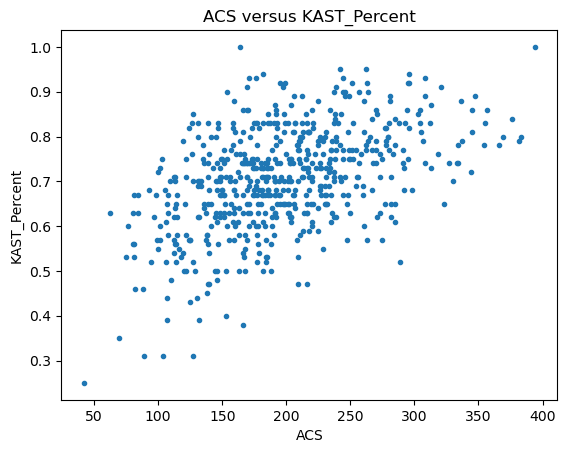

In [39]:
plt.scatter(filtered["ACS"], filtered["KAST_Percent"], marker=".")
plt.title("ACS versus KAST_Percent")
plt.xlabel("ACS")
plt.ylabel("KAST_Percent")
plt.show()

En este gráfico se puede observar que, si bien mientras crezca el ACS crecerá el KAST, existen muchos KAST altos para ACS relativamente bajos. Con esto, podemos concluir que no sería correcto clasificar un jugador sólo por su ACS, ya que puede tener impacto a través de otras variables no relacionadas al daño.

---
**Gráfico 3: ACS por agente** <br>
En este gráfico se presentan los agentes del juego, cada agente tiene habilidades para distintas utilidades dentro del juego.

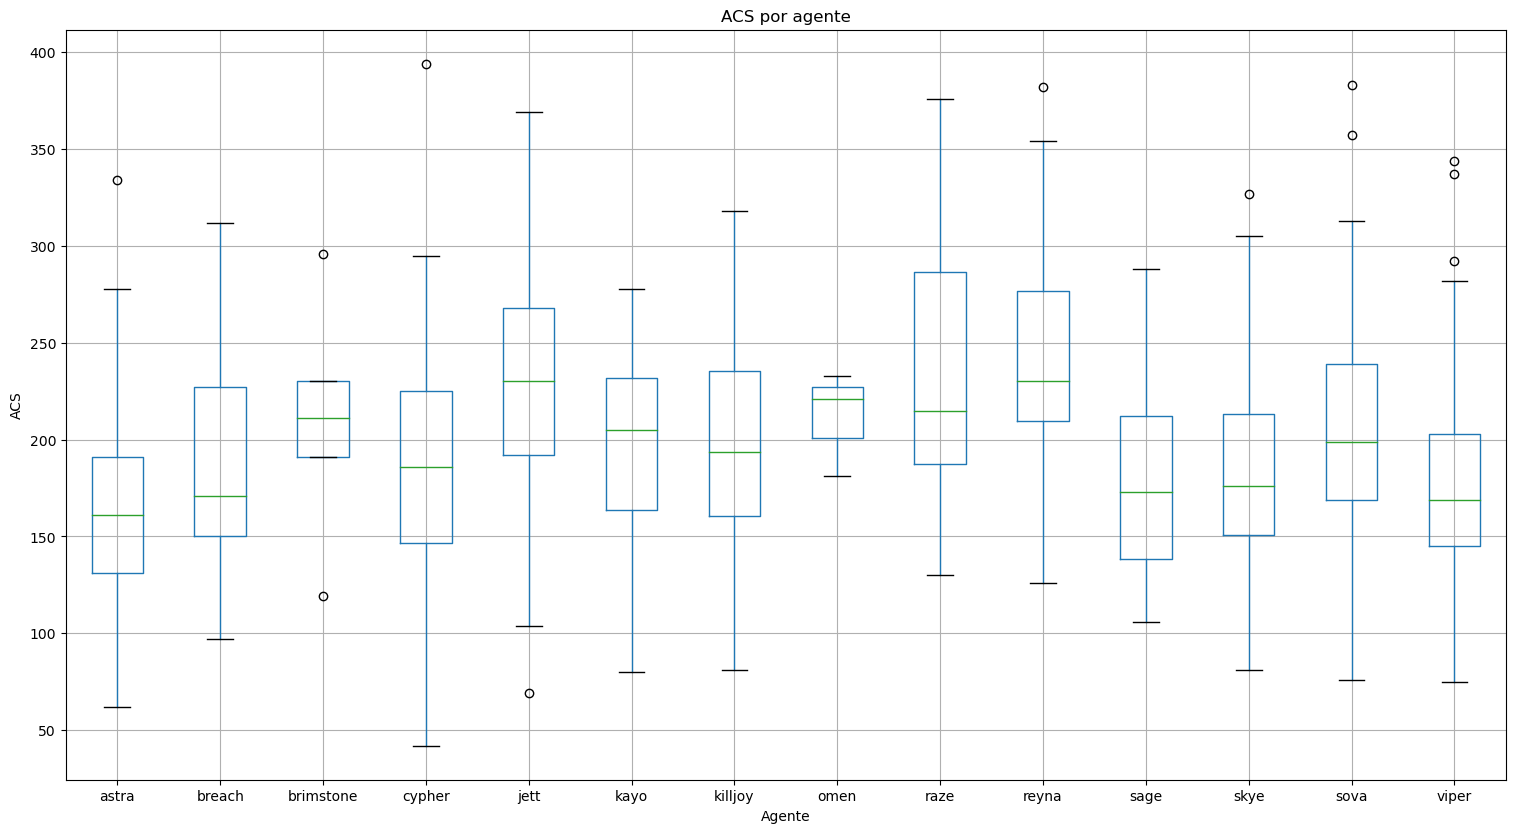

In [40]:
newdf = filtered[["ACS", "Agent"]]
newdf = newdf[newdf.Agent != ""]
newdf.boxplot(column="ACS", by="Agent", figsize=(18,10))
plt.title("ACS por agente")
plt.suptitle("")
plt.xlabel("Agente")
plt.ylabel("ACS")
plt.show()

Con este gráfico se puede notar que hay agentes que usualmente tienen mayor ACS, y conociéndo el juego, eso se puede atrubuir que las habilidades de esos agentes están enfocadas a obtener kills. Aún así, se aprecia que la media de ACS es más o menos similar en todos los agentes del juego.

---

**Gráfico 4: ACS promedio por Jugador** <br>
Calculamos el promedio de ACS de todas las partidas registradas de los jugadores, y mostramos los mejores 10.

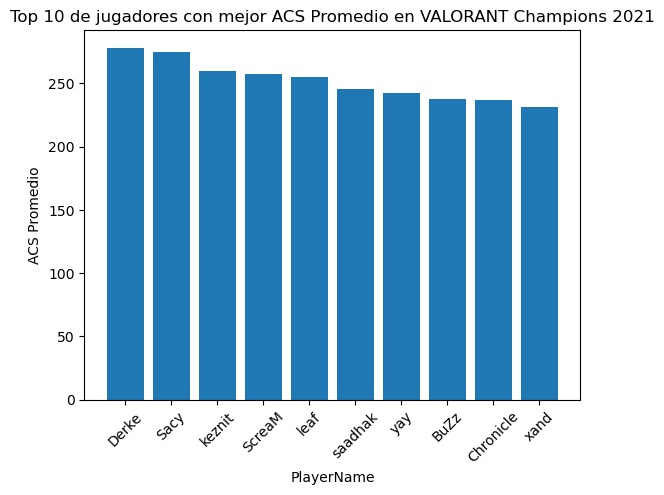

<Figure size 600x1200 with 0 Axes>

In [41]:
acs_avg = filtered.groupby('PlayerName')['ACS'].mean().reset_index()

top_10 = acs_avg.sort_values(by='ACS', ascending=False).head(10)

plt.bar(top_10['PlayerName'], top_10['ACS'])
plt.xlabel('PlayerName')
plt.ylabel('ACS Promedio')
plt.title('Top 10 de jugadores con mejor ACS Promedio en VALORANT Champions 2021')

plt.xticks(rotation=45, fontsize=10)
plt.figure(figsize=(6,12))
plt.subplots_adjust(bottom=0.4)

plt.show()

Con este gráfico podemos ver los jugadores profesionales con mejor promedio de ACS para luego ver sus demás estadísticas y encontrar distintas relaciones para clasificarlos.

# Preguntas y Problemas

Dada la alta competitividad que existe actualmente en la escena de los eSports, podría ser muy útil para los equipos observar tendencias en las partidas profesionales, ya sea para inventar nuevas estrategias, identificar los mejores jugadores, generar elecciones óptimas de agentes, entre otros, para que así los equipos tomen las mejores decisiones y tengan más probabilidades de ganar. Podríamos plantearnos las siguientes preguntas para resolver con minería de datos:

- ¿Podemos encontrar patrones para predecir qué equipo es más probable que gane?
- ¿Qué características hace que un jugador tenga mayor impacto en el resultado de una partida?
- Existen casos de jugadores que han parecido ser de élite usando un solo agente, pero resultan ser jugadores promedio cuando su personaje recibe nerfs[1]. ¿Es posible identificar cuando un jugador esta teniendo un alto rendimiento sólo debido al personaje que usa?

*[1]: Los nerfs son cambios negativos que el desarrollador de un juego le hace a un personaje cuando identifica que el uso de ese personaje conlleva a una partida desequilibrada, muy a favor del *

Dataset: Cristóbal Isla y Nicolás Peña. <br>
Informe: Carlos Ambiado, Cristóbal Isla, Felipe Jara, Nicolás Peña y Manuel Sepúlveda. <br>
Gráficos y código: Carlos Ambiado, Felipe Jara y Cristóbal Isla. <br>